<h1><center>Laboratorio 8: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Carolina Salgado
- Nombre de alumno 2: Sebastián Urbina


### **Link de repositorio de GitHub:** `http://....`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [113]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


# Metricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
# !pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [114]:
pd.options.display.max_columns = None

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [115]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [116]:
df_players = pd.read_csv('recursos/stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,1,12,11,12,12,13,25,48,12,37,35,12,22,19,25,21,17,52,52,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,1,13,11,11,12,11,15,43,12,27,22,14,27,26,16,19,21,42,45,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,2,44,39,40,29,35,44,42,38,41,35,35,48,42,62,60,64,34,83,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,1,17,13,11,11,14,23,46,12,13,28,15,20,15,42,40,40,61,60,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [117]:
# df_players['National_Position'].value_counts(dropna=False)#.plot(kind='bar')

In [118]:
# Reemplazamos los NAN por "no_seleccionado"
df_players['National_Position'] = df_players['National_Position'].fillna(value = 'no_seleccionado')

# Creamos la target en base a los "no_seleccionado"
df_players['target'] = df_players['National_Position'].apply(lambda x: x if x=='no_seleccionado' else 'seleccionado')

# Hacemos el conteo
df_players['target'].value_counts()#.plot(kind='bar')

no_seleccionado    16513
seleccionado        1075
Name: target, dtype: int64

    Se puede notar que hay 16.513 jugadores que no fueron seleccionados para jugar por su país y 1.075 si lo fueron.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

Aplicaremos las siguientes transformaciones:

- Encoders:
1. OneHotEncoder:
   1. Name
   2. Nationality
   3. National_Position
   4. Club_Position
   5. Preffered_Foot
   6. Weak_foot
   7. Skill_Moves
   8. Work_Rate

- Escalamientos:
  1. MinMaxScaler:
     1. Marking: La distribución parece bimodal.
     2. Sliding_Takle: La distribución parece bimodal.
     3. Standing_Tackle: 
     4. Interceptions
     5. Crossing
     6. Stamina
     7. Heading
     8. Shot_Power
     9. Finishing
     10. Long_Shots
     11. Curve
     12. Freekick_Accuracy
     13. Age
     14. Ball_Control
     15. Dribbling
  2. StandardScaler:
     1. Aggresion: La distribución parece normal
     2. Reactions: La distribución parece normal
     3. Vision: La distribución parece normal
     4. Composure
     5. Short_Pass
     6. Long_Pass
     7. Acceleration
     8. Speed
     9. Strength
     10. Balance
     11. Agility
     12. Jumping
     13. Penalties
     14. Volleys
     15. Height
     16. Weight

In [119]:
preprocessing = ColumnTransformer(
            [
                (
                    "MinMaxScaler",
                    MinMaxScaler(),
                    [   
                        "Age",
                        "Ball_Control",
                        "Dribbling",
                        "Marking",
                        "Sliding_Tackle",
                        "Standing_Tackle",
                        "Interceptions",
                        "Crossing",
                        "Stamina",
                        "Heading",
                        "Shot_Power",
                        "Finishing", #! Tengo dudas
                        "Long_Shots", #! Tengo dudas
                        "Curve", #! Tengo dudas
                        "Freekick_Accuracy" #! Tengo dudas
                    ],
                ),
                (
                    "StandardScaler",
                    StandardScaler(),
                    [
                        "Height",
                        "Weight",
                        "Aggression", #! Tengo dudas
                        "Reactions",
                        "Vision",
                        "Composure",
                        "Short_Pass",
                        "Long_Pass",
                        "Acceleration",
                        "Speed",
                        "Strength",
                        "Balance",
                        "Agility",
                        "Jumping",
                        "Penalties", #! Tengo dudas
                        "Volleys"
                    ]
                ),
                (
                    "OneHot",
                    OneHotEncoder(sparse=False, handle_unknown="ignore"),
                    [   
                        # "Name", # Son muchas categorías
                        # "Nationality",# Son muchas categorías
                        # "National_Position", # Son muchas categorías
                        # "Club_Position", # Son muchas categorías
                        "Preffered_Foot",
                        "Weak_foot",
                        "Skill_Moves",
                        "Work_Rate"
                    ],
                ),
            ],
        remainder='passthrough'
        )



Como tenemos menos de 100K de observaciones vamos a probar en primer lugar el modelo de ``Support Vector Machine`` con kernel Lineal. Posteriormente testearmeos ``KNN`` y por último el modelo de ``Random Forest``.

In [120]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Pipeline SVM
pipeline_SVM = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("SVM", LinearSVC(random_state=0))
    ]
)

# Pipeline KNN
pipeline_KNN = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("KNN", KNeighborsClassifier())
    ]
)

# Pipeline RFC
pipeline_RFC = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("RFC", RandomForestClassifier(random_state=0))
    ]
)

# # Pipeline ETC
# pipeline_ETC = Pipeline(
#     steps = [
#         ("preprocessing", preprocessing),
#         ("ETC", ExtraTreesClassifier(random_state=0))
#     ]
# )

Creamos la siguiente función para faciliar el entrenamiento y evaluación de los modelos.

In [121]:
def train_and_evaluate(pipe,X_train, y_train, X_test, y_test):

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(100*'-')
    print(f"Modelo: {pipe.steps[1][0]}")
    print("Matriz de confusión: \n")
    print(confusion_matrix(y_test, y_pred, labels=pipe.classes_))
    print("\nReporte de Clasificación: \n")
    print(
        classification_report(y_test, y_pred, target_names=pipe.classes_),
    )
    print(100*'-')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Macro f1-score: {f1_score(y_test, y_pred, average="macro")}')
    print(100*'-')

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

Para evitar data leakage, se elimina la columna `National_Position`. Además, eliminaremos ``Name``, ``Nationality``  y ``Club_Position`` ya que presentan una alta cardinalidad

In [122]:
cols_to_drop = ['National_Position', 'Name', 'Nationality','Club_Position']
df_copy = df_players.drop(columns=cols_to_drop)

Separamos los conjuntos de entrenamiento y test.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(columns = "target"), 
                                                    df_copy["target"], 
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    stratify=df_copy["target"], 
                                                    random_state=0)

Entrenamos los pipelines.

In [124]:
train_and_evaluate(
    pipeline_SVM,
    X_train = X_train, 
    y_train = y_train, 
    X_test = X_test, 
    y_test = y_test
    )

c:\Users\carol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------------------------------------------------------------------
Modelo: SVM
Matriz de confusión: 

[[3303    0]
 [ 215    0]]

Reporte de Clasificación: 

                 precision    recall  f1-score   support

no_seleccionado       0.94      1.00      0.97      3303
   seleccionado       0.00      0.00      0.00       215

       accuracy                           0.94      3518
      macro avg       0.47      0.50      0.48      3518
   weighted avg       0.88      0.94      0.91      3518

----------------------------------------------------------------------------------------------------
Accuracy: 0.9388857305287095
Macro f1-score: 0.48423984752968774
----------------------------------------------------------------------------------------------------


c:\Users\carol\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sam

In [125]:
train_and_evaluate(
    pipeline_KNN,
    X_train = X_train, 
    y_train = y_train, 
    X_test = X_test, 
    y_test = y_test
    )

c:\Users\carol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------------------------------------------------------------------
Modelo: KNN
Matriz de confusión: 

[[3285   18]
 [ 196   19]]

Reporte de Clasificación: 

                 precision    recall  f1-score   support

no_seleccionado       0.94      0.99      0.97      3303
   seleccionado       0.51      0.09      0.15       215

       accuracy                           0.94      3518
      macro avg       0.73      0.54      0.56      3518
   weighted avg       0.92      0.94      0.92      3518

----------------------------------------------------------------------------------------------------
Accuracy: 0.939169982944855
Macro f1-score: 0.559624419736448
----------------------------------------------------------------------------------------------------


In [126]:
train_and_evaluate(
    pipeline_RFC,
    X_train = X_train, 
    y_train = y_train, 
    X_test = X_test, 
    y_test = y_test
    )

c:\Users\carol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------------------------------------------------------------------
Modelo: RFC
Matriz de confusión: 

[[3292   11]
 [ 190   25]]

Reporte de Clasificación: 

                 precision    recall  f1-score   support

no_seleccionado       0.95      1.00      0.97      3303
   seleccionado       0.69      0.12      0.20       215

       accuracy                           0.94      3518
      macro avg       0.82      0.56      0.58      3518
   weighted avg       0.93      0.94      0.92      3518

----------------------------------------------------------------------------------------------------
Accuracy: 0.942865264354747
Macro f1-score: 0.5847895081428156
----------------------------------------------------------------------------------------------------


**Respuesta**:

```
La métrica Accuracy mide la proporción de datos correctamente clasificados dentro del total. En términos del problema, esto sería el porcentaje de futbolistas seleccionados y no seleccionados cuya predicción del modelo coincide con la realidad. Por ejemplo, en el modelo SVM, se tiene que el 94% de los futbolistas fueron correctamente clasificados, considerando ambas clases.

Si se considera que la clase positiva es 1, es decir, que el futbolista es seleccionado, la métrica Precision cuantifica la proporción de futbolistas clasificados como seleccionados que realmente lo son, dentro de todos los futbolistas que fueron clasificados como seleccionados en el modelo. Por ejempplo, en el modelo KNN, se puede decir que de todos los futbolistas clasificados como seleccionados, solo el 51% resultó ser efectivamente un futbolista de estas características.

Nuevamente, si se considera que la clase positiva es 1, la métrica Recall indica el porcentaje de futbolistas clasificados como seleccionados que realmente lo son dentro de todos los futbolistas que realmente son seleccionados. Por ejemplo, en el modelo ETC, podría decirse que de todos los futbolistas que realmente son seleccionados, el 12% son clasificados como seleccionados por el modelo.

Por otro lado, se sabe que el desbalance de los datos podría afectar el desempeño del modelo. Ya que, en términos generales, si el algoritmo es entrenado con un set de datos con mucho desbalance en las etiquetas, este podría tener un cierto grado de sesgo para predecir por la clase que tiene una mayor cantidad de datos. Todo esto se menciona porque anteriormente se vió que la cantidad de futbolistas no seleccionados es $16,513$, mientras que la cantidad de seleccionados es $1,075$, por lo tanto, hay un desbalance en las etiquetas. Y en los resultados, esto es apreciable en que la clase 1 tiende a tener peores métricas de desempeño que la clase 0. De hecho, en el modelo KNN, las métricas de Precision, Recall y F1 para la clase 0 están por sobre el 94%, mientras que las mismas métricas para la clase 1 se encuentran bajo el 51%. Resultados similares ocurren para el resto de los modelos SVM y RFC. Sin embargo, la métrica de Accuracy para los tres modelos es del 94%, pero esto se debe al propio desbalance, ya que el solo hecho de clasificar gran parte como la clase 0 ayuda a hacer crecer esta medida.

Finalmente, se llegó a modelos bastante sesgados en torno a la predicción, ya que tienden a clasificar los registros con la clase de futbolista no seleccionado. Para poder solucionar esto, es decir, reducir el sesgo de los modelos, se podrían aplicar técnicas de balance en los datos, como undersampling u oversampling.
```

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [127]:
cols_to_drop = ['National_Position', 'Name', 'Nationality']

df_pred_pos = df_players.copy()
df_pred_pos = df_pred_pos.drop(columns=cols_to_drop)
df_pred_pos = df_pred_pos.loc[~df_pred_pos['Club_Position'].isin(['Sub','Res'])] # Quitamos los registros de Sub y Res

In [128]:
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

def asignar_categoria(posicion):
    if posicion in ataque:
        return 'ataque'
    elif posicion in central_ataque:
        return 'central_ataque'
    elif posicion in central:
        return 'central'
    elif posicion in central_defensa:
        return 'central_defensa'
    elif posicion in defensa:
        return 'defensa'
    elif posicion in arquero:
        return 'arquero'
    else:
        return 'otro'

In [129]:
df_pred_pos['target'] = df_pred_pos['Club_Position'].apply(asignar_categoria)
df_pred_pos = df_pred_pos[df_pred_pos['target']!='otro'] # Filtramos los que no aparecen en las categorias
# Eliminamos Club Positions para evitar Data Leakage
df_pred_pos.drop(columns='Club_Position', inplace=True)

<AxesSubplot:title={'center':'Distribución target'}>

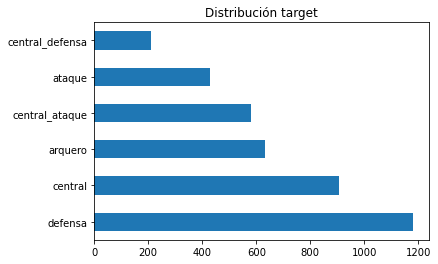

In [130]:
df_pred_pos['target'].value_counts().plot(kind='barh', title='Distribución target')

    Se puede observar que la mayoría de los label resultantes corresponden a la posición de defensa y el mínimo a la de defensa central.

In [131]:
print(f"Cantidad de datos: {df_pred_pos.shape}")

Cantidad de datos: (3939, 36)


    Podemos notar que tenemos 3939 datos y nos encontramos en una situación similar a la anterior, por lo que probaremos los mismos modelos.

In [132]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(
    df_pred_pos.drop(columns = "target"), 
    df_pred_pos["target"], 
    train_size=0.8, 
    test_size=0.2, 
    random_state=0,
    stratify=df_pred_pos["target"]
    )

In [133]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Pipeline SVM
pipeline_SVM = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("SVM", LinearSVC(random_state=0))
    ]
)

# Pipeline KNN
pipeline_KNN = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("KNN", KNeighborsClassifier())
    ]
)

# Pipeline RFC
pipeline_RFC = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("RFC", RandomForestClassifier(random_state=0))
    ]
)

# # Pipeline ETC
# pipeline_ETC = Pipeline(
#     steps = [
#         ("preprocessing", preprocessing),
#         ("ETC", ExtraTreesClassifier(random_state=0))
#     ]
# )

In [134]:
pipeline_SVM.steps[1][0]

'SVM'

In [135]:
train_and_evaluate(
    pipeline_SVM,
    X_train = X_train_pos, 
    y_train = y_train_pos, 
    X_test = X_test_pos, 
    y_test = y_test_pos
    )

c:\Users\carol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------------------------------------------------------------------
Modelo: SVM
Matriz de confusión: 

[[126   0   0   0   0   0]
 [  0  72  11   3   0   0]
 [  0  11 122  24   1  24]
 [  0  15  56  37   1   7]
 [  0   1   5   4   7  25]
 [  0   0   5   0   1 230]]

Reporte de Clasificación: 

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.73      0.84      0.78        86
        central       0.61      0.67      0.64       182
 central_ataque       0.54      0.32      0.40       116
central_defensa       0.70      0.17      0.27        42
        defensa       0.80      0.97      0.88       236

       accuracy                           0.75       788
      macro avg       0.73      0.66      0.66       788
   weighted avg       0.74      0.75      0.73       788

---------------------------------------------------------------------------------------------------

c:\Users\carol\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [136]:
train_and_evaluate(
    pipeline_KNN,
    X_train = X_train_pos, 
    y_train = y_train_pos, 
    X_test = X_test_pos, 
    y_test = y_test_pos)

c:\Users\carol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------------------------------------------------------------------
Modelo: KNN
Matriz de confusión: 

[[126   0   0   0   0   0]
 [  0  61  15   6   2   2]
 [  0  13 105  36   2  26]
 [  0  12  63  30   3   8]
 [  0   0  11   1   6  24]
 [  0   0  20   3   9 204]]

Reporte de Clasificación: 

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.71      0.71      0.71        86
        central       0.49      0.58      0.53       182
 central_ataque       0.39      0.26      0.31       116
central_defensa       0.27      0.14      0.19        42
        defensa       0.77      0.86      0.82       236

       accuracy                           0.68       788
      macro avg       0.61      0.59      0.59       788
   weighted avg       0.65      0.68      0.66       788

---------------------------------------------------------------------------------------------------

In [137]:
train_and_evaluate(
    pipeline_RFC,
    X_train = X_train_pos, 
    y_train = y_train_pos, 
    X_test = X_test_pos, 
    y_test = y_test_pos
)

c:\Users\carol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------------------------------------------------------------------
Modelo: RFC
Matriz de confusión: 

[[126   0   0   0   0   0]
 [  0  72   9   5   0   0]
 [  0   9 130  22   1  20]
 [  0   9  62  38   2   5]
 [  0   0   6   2   6  28]
 [  0   0   5   0   2 229]]

Reporte de Clasificación: 

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.80      0.84      0.82        86
        central       0.61      0.71      0.66       182
 central_ataque       0.57      0.33      0.42       116
central_defensa       0.55      0.14      0.23        42
        defensa       0.81      0.97      0.88       236

       accuracy                           0.76       788
      macro avg       0.72      0.67      0.67       788
   weighted avg       0.74      0.76      0.74       788

---------------------------------------------------------------------------------------------------

**Respuesta**:

```
Los tres modelos promedian un Accuracy del 73%, es decir, el 73% de las clasificaciones de posición son correctas.

Por otra parte, se observa que hay clases que tienen mejores predicciones que otras. Exactamente, la posición de arquero tiene una clasificación perfecta, ya que se alcanza el 71% en todas las métricas respectivas a la clase, mientras que ataque y defensa tienen métricas por sobre el 80%. A diferencia de las etiquetas central, central_ataque y central_defensa que tienen valores generalmente más bajos.

En este caso, se puede ver que el desbalance no está afectando en mayor medida a la clases minoritarias. Así que una posible mejora de los resultados podría obtenerse si se realiza ingeniería de atributos sobre los datos y ajustando los hiperparámetros de cada modelo.
```

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

En el contexto de las regresiones lineales, la métrica $R^2$ se define como la proporción de la variabilidad explicada por las variables independientes del modelo dentro de la variabilidad total del mismo (lo que incluye tanto la varianza dada por las variables explicativas como la dispersión asociada al residuo, es decir, factores que no están siendo capturados por la regresión).

De acuerdo a la guía, como el dataset tiene menos de 100,000 registros, se decide ocupar el modelo Ridge Regression.

In [138]:
# Se cargan los datos
df_salary = pd.read_csv('recursos/salarios.csv')
df_salary.head()

,Unnamed: 0,Player,Weekly Salary
0,1528,Lionel Messi,1538905.0
1,1006,Cristiano Ronaldo,1248536.0
2,1529,Antoine Griezmann,997032.0
3,2004,Neymar,797726.0
4,1530,Gareth Bale,607706.0


In [139]:
df_players_s = pd.merge(df_players, df_salary, left_on="Name", right_on="Player", how="left")
df_players_s.drop(columns=["Unnamed: 0", "Player"], inplace=True)
df_players_s.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,target,Weekly Salary
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,seleccionado,1248536.0
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,seleccionado,1538905.0
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,seleccionado,797726.0
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,seleccionado,508923.0
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,seleccionado,326233.0


In [140]:
preprocessing_1 = ColumnTransformer(
            [
                (
                    "MinMaxScaler",
                    MinMaxScaler(),
                    [   
                        "Age",
                        "Ball_Control",
                        "Dribbling",
                        "Marking",
                        "Sliding_Tackle",
                        "Standing_Tackle",
                        "Interceptions",
                        "Crossing",
                        "Stamina",
                        "Heading",
                        "Shot_Power",
                        "Finishing", #! Tengo dudas
                        "Long_Shots", #! Tengo dudas
                        "Curve", #! Tengo dudas
                        "Freekick_Accuracy" #! Tengo dudas
                    ],
                ),
                (
                    "StandardScaler",
                    StandardScaler(),
                    [
                        "Height",
                        "Weight",
                        "Aggression", #! Tengo dudas
                        "Reactions",
                        "Vision",
                        "Composure",
                        "Short_Pass",
                        "Long_Pass",
                        "Acceleration",
                        "Speed",
                        "Strength",
                        "Balance",
                        "Agility",
                        "Jumping",
                        "Penalties", #! Tengo dudas
                        "Volleys"
                    ]
                ),
                (
                    "OneHot",
                    OneHotEncoder(sparse=False, handle_unknown="ignore"),
                    [   
                        # "Name", # Son muchas categorías
                        "Nationality",# Son muchas categorías
                        "National_Position", # Son muchas categorías
                        "Club_Position", # Son muchas categorías
                        "Preffered_Foot",
                        "Weak_foot",
                        "Skill_Moves",
                        "Work_Rate"
                    ],
                ),
            ],
        remainder='passthrough'
        )

In [231]:
cols_to_drop = ['Name', "target"]
df_copy_s = df_players_s.drop(columns=cols_to_drop)
df_copy_s = df_copy_s.loc[df_copy_s["Weekly Salary"].notna(),:]
df_copy_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 0 to 17469
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nationality        1866 non-null   object 
 1   National_Position  1866 non-null   object 
 2   Club_Position      1866 non-null   object 
 3   Height             1866 non-null   int64  
 4   Weight             1866 non-null   int64  
 5   Preffered_Foot     1866 non-null   object 
 6   Age                1866 non-null   int64  
 7   Work_Rate          1866 non-null   object 
 8   Weak_foot          1866 non-null   int64  
 9   Skill_Moves        1866 non-null   int64  
 10  Ball_Control       1866 non-null   int64  
 11  Dribbling          1866 non-null   int64  
 12  Marking            1866 non-null   int64  
 13  Sliding_Tackle     1866 non-null   int64  
 14  Standing_Tackle    1866 non-null   int64  
 15  Aggression         1866 non-null   int64  
 16  Reactions          1866

In [232]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Pipeline Ridge Regression (RR)
pipeline_RR = Pipeline(
    steps = [
        ("preprocessing", preprocessing_1),
        ("RR", Ridge(alpha = 10))
    ]
)

In [233]:
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(
    df_copy_s.drop(columns = "Weekly Salary"), 
    df_copy_s["Weekly Salary"], 
    train_size=0.8, 
    test_size=0.2, 
    random_state=0,
    )

In [234]:
pipeline_RR.fit(X_train_sal, y_train_sal)

c:\Users\carol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'Ball_Control',
                                                   'Dribbling', 'Marking',
                                                   'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Interceptions', 'Crossing',
                                                   'Stamina', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  [...
                                                   'Aggression', 'Reactions',
                                                   'Vision', 'Composure',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Strength', 'Balance',
                                                   'Agility', 'Jumping',
                                                   'Penalties', 'Volleys']),
                                                 ('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Nationality',
                                                   'National_Position',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Work_Rate'])])),
                ('RR', Ridge(alpha=10))])

In [235]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

def evaluate(y_test, y_pred):

    print('MSE:', mean_squared_error(y_test, y_pred), '\n')
    print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MedAE:', median_absolute_error(y_test, y_pred), '\n')
    print('R²:', r2_score(y_test, y_pred))

ridge_y_pred = pipeline_RR.predict(X_test_sal)

evaluate(y_test_sal, ridge_y_pred)

MSE: 7488282352.288511 

RMSE: 86534.86206315066
MAE: 34981.821003969206
MedAE: 23028.48788891404 

R²: 0.31791373590989547


**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>